<a href="https://colab.research.google.com/github/XiadaniCue/Simulaci-n-1/blob/main/Integraci%C3%B3n_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Integración MC**

Necesitamos calcular
$$\int_{0}^{1} \sqrt{arctan(x)} dx$$

que no es integrable por m etodos analíıticos.
Por ello, se puede estimar esta integral numericamente de varias maneras: por ejemplo, mediante sumas de Riemann, implementando el MC o implementando un MC en la región bidimensional que acota la función $f(x)= \sqrt{arctan(x)}$ en el plano cartesiano.


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

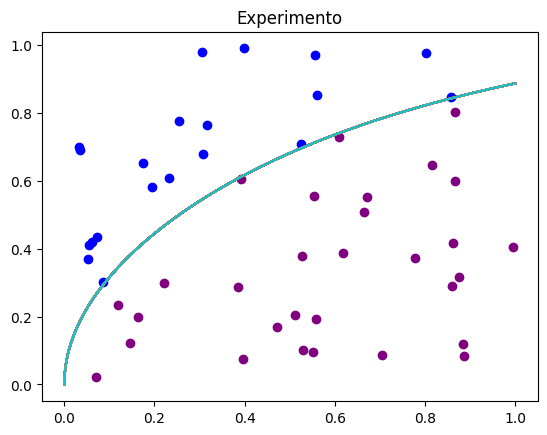

In [194]:
#Hacemos nuestro exprimento para ver cuantos puntos caen bajo la curva

plt.title('Experimento')
x=np.linspace(0,1,1000)
for i in range(50):
  u1=rnd.random()
  u2=rnd.random()
  if u2 <= np.sqrt(np.arctan(u1)):
    plt.plot(x,np.sqrt(np.arctan(x)))
    plt.scatter(u1,u2, color="purple")
  else:
    plt.plot(x,np.sqrt(np.arctan(x)))
    plt.scatter(u1,u2, color="blue")
plt.show()

#Método de Monte Carlo de la Media Muestral
1. Generar una secuencia $\{U_i \}_{i=n}^n \sim U(0,1)$.
2. Calcular $x_i= a + U_i(b-a)$
3. Calcular $g(x_i)$ para $i=1, ..., n$
4. Estimar I calculando la media muestral $ϴ_1$
$$ϴ_1=(b-a) \frac{1}{n} ∑_{i=1}^{n} g(x_i)$$
Con $x_i \sim U(0,1)$

In [166]:
#Valores de nuestros limites
a = 0 #limite inferior
b =  1 #limite superior

In [167]:
#Calculamos las g(x_i)
def est(n):
  gx_i = [] #En esta lista se iran anexando los valores de g(x_i)

  for i in range(n):
    u = rnd.random() #Número aletorio generado
    x = a + u*(b-a) #Calculamos x
    g = np.sqrt(np.arctan(x)) #Evaluamos x
    gx_i.append(g)
  return gx_i

In [168]:
#Calculamos la suma de la de los g(x_i)
def sum_g(n):
  G = est(n) #Aqui llamamos a la función
  variable = 0 #Hacemos un contador
  listag_i = []
  for i in G:
    variable= variable+i #Sumamos valores
    listag_i.append(variable)
  return listag_i

Calculamos la aproximación que esta dada por:
$$I= \frac{1}{n} \{ g(x_1) + ... + g(x_n) \} $$

In [169]:
#Calculamos el valor de I
def I(n):
  suma_gi= sum_g(n) #Nuestras sumas
  lista1 = []
  for k in suma_gi:
    i =(1/n)*(k) #Se calcula I
    lista1.append(i)
  return lista1[-1] #Queremos el ultimo elemento de la lista


In [170]:
#Nuestra simulación nos queda:
def sim(N,n): #Para n experimentos con m iteraciones
  lista2 = []
  for i in range(N):
    calculo = I(n)
    lista2.append(calculo)
  return lista2

In [171]:
T=sim(1000, 50) #Nuestro estimador para 1000 experimentos y 50 que es el tamaño de la mmuestra

Text(0.5, 1.0, 'Histograma de muestra n=50, simulado 1000 veces')

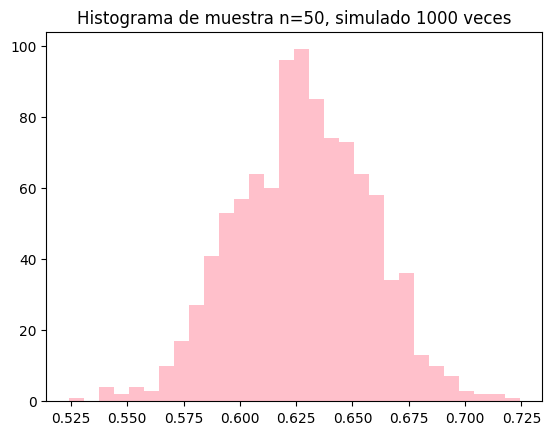

In [172]:
#Graficamos nuestro histograma del los resultados de esta integración MC repetida 1000 veces
plt.hist(T, bins=30, color="pink")
plt.title("Histograma de muestra n=50, simulado 1000 veces")

In [173]:
#Calculamos la media
mu=np.mean(T)
print(mu)

0.6280000739954827


Text(0.5, 1.0, 'Simulación')

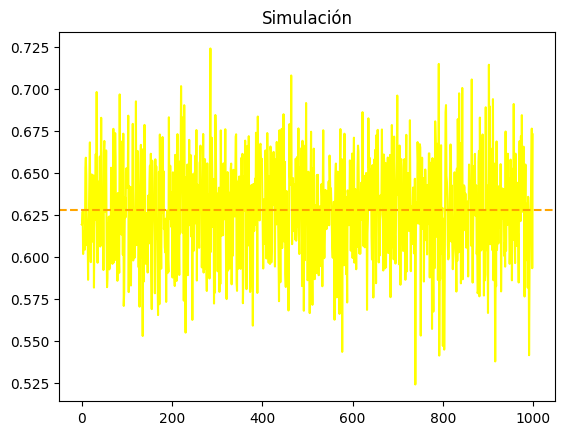

In [174]:
#Graficamos nuestra simulación
plt.plot(T, color="yelloW")
plt.axhline(mu, color='orange', linestyle='--')
plt.title("Simulación")

In [175]:
#Estimamos nuestro Teta_1
n=50 #Tamaño de la muestra
Teta_1=(b-a)*I(n)
print(Teta_1)

0.6305241843782655


Ahora lo resolveremos por

#**El Método  de Monte Carlo de Acierto y Error**

1. Generar una secuencia $\{U_i \}_{i=n}^{2n} \sim U(0,1)$.
2. Conformar pares $ (U_i, U_{n+i})$ para $i=1, ..., n$
3. Calcular $x_i= a + U_i(b-a)$ para $i=1, ...,n$
4. Calcular $g(x_i)$ para $i=1, ..., n$
5. Calcular los aciertos $n_a$, tales que $g(x_i)>cU_{n+i}$
6. Estimar I calculando la media muestral $ϴ_2$
$$I \approx ϴ_2=c(b-a) \frac{n_a}{n}$$
donde $n_a$ es el nÚmero de puntos bajo o sobre la curva, es decir, los aciertos del muestreo.
Y $c$ como algún valor que acote la función en todo el intervalo de integración,


In [176]:
#Tomaremos a c como el valor máximo de función
c=1

In [177]:
#Hacemos el paso 1 y 2

#Conformamos pares
def listau(n): #Los generaremos
  lista1 = []
  lista2 = []
  for i in range(1, 2*n):#Aqui hacemos el rango de 1 a la 2n
  #Dividimos la lista en pares e impares
    u = rnd.random() #Número aleatorio generado
    if i % 2 == 0:#Aquí generamos numero pares U_n+i
      lista1.append(u)
    elif i % 2 != 0 :#Generamos números impares U_i
      lista2.append(u)
  return lista1, lista2

In [178]:

S=listau(5)
print(S)
print(S[1])

([0.9693169074444982, 0.9802200331308477, 0.19793432419068535, 0.17715392784584005], [0.17514041963016758, 0.9050242023817532, 0.746123833727343, 0.014814471817595876, 0.891075785241001])
[0.17514041963016758, 0.9050242023817532, 0.746123833727343, 0.014814471817595876, 0.891075785241001]


In [179]:
# 3. Evaluamos nuestros puntos

def evalu(n):
   Us=listau(n)
   lista_x = []
   for j in Us[1]:
    x = a + j*(b-a) #Ocupamos la lista de impares que correponde a los u_i
    lista_x.append(x)
   return lista_x

In [180]:
evalu(5)

[0.7755534672769244,
 0.4897644987586346,
 0.4268867239398836,
 0.010672250452554266,
 0.6887847070905603]

In [181]:
# 4. Hacemos la evalución de las x en la función

def g_xi(n):
  x = evalu(n) # Se llama a la funcion anterior
  lista3 = []
  for k in x:
    valor = np.sqrt(np.arctan(k))
    lista3.append(valor)
  return lista3

In [182]:
g_xi(5)

[0.6226388331808285,
 0.5387708039662912,
 0.5852145223542562,
 0.8072591197460568,
 0.5063145182615302]

In [183]:
# 5. Calcular los aciertos  n_a , tales que  g(xi)>cUn+i

def aciertos(n): #Hacemos la comparación
  p = g_xi(n) #Llamamos a la funcion anterior
  S=listau(n)
  Un=S[0]
  contador = 0
  for a in range(n-1):
    if p[a]>c*Un[a]:
      contador += 1
  return contador

In [184]:
# 6. Calculamos el valor teta2

def teta2(n): #Calcularemos los I
  Na = aciertos(n)
  listaI = []
  I = c*(b-a)*(Na/n) #Se calculan los I
  listaI.append(I)
  return listaI[-1]


In [185]:
#Imprimimos el valor de teta2
teta2(1000)

0.635

In [186]:
#Para poder simular repetimos el experimento n veces

def simul(O,n):
  lista5 = []
  for i in range(O):
    error = teta2(n)
    lista5.append(error)
  return lista5

In [187]:
T2=simul(1000,50)

Text(0.5, 1.0, 'Histograma de muestra n=50, simulado 1000 veces')

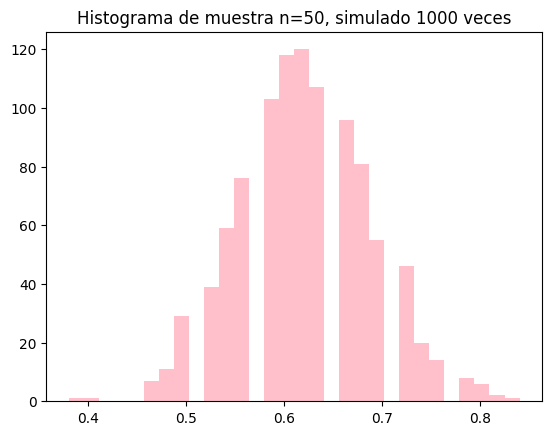

In [188]:
#Graficamos nuestro histograma del los resultados de esta integración MC repetida 1000 veces
plt.hist(T2, bins=30, color="pink")
plt.title("Histograma de muestra n=50, simulado 1000 veces")

In [189]:
#Calculamos la media
mu2=np.mean(T2)
print(mu2)

0.6209199999999998


Text(0.5, 1.0, 'Simulación')

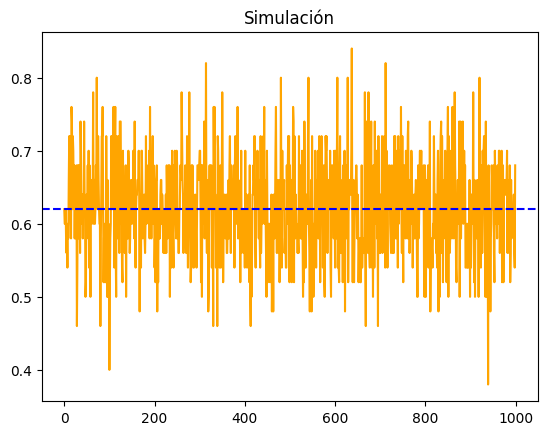

In [190]:
#Graficamos nuestra simulación
plt.plot(T2, color="orange")
plt.axhline(mu2, color='blue', linestyle='--')
plt.title("Simulación")

In [191]:
#Comparamos las medias
print('Media Muestral', mu)
print('Acierto y Error', mu2)

Media Muestral 0.6280000739954827
Acierto y Error 0.6209199999999998
